# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(geoapify_key)

bf74f5d8b4d4449ecbab844a61ee68842a4e986d


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kanniyakumari
Processing Record 2 of Set 1 | ahau
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | kapuskasing
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | sillanwali
Processing Record 13 of Set 1 | urangan
Processing Record 14 of Set 1 | mahina
Processing Record 15 of Set 1 | ventspils
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | drayton valley
Processing Record 20 of Set 1 | thenia
Processing Record 21 of Set 1 | port elizabeth
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kanniyakumari,8.0833,77.5667,300.93,76,100,9.28,IN,1701144884
1,ushuaia,-54.8000,-68.3000,281.96,66,20,1.54,AR,1701144885
2,alice springs,-23.7000,133.8833,306.90,16,26,3.60,AU,1701144885
3,ust-nera,64.5667,143.2000,248.35,100,100,1.66,RU,1701144885
4,kapuskasing,49.4169,-82.4331,263.51,91,100,5.24,CA,1701144609
...,...,...,...,...,...,...,...,...,...
570,yalutorovsk,56.6536,66.3006,273.69,95,100,4.02,RU,1701145179
571,christchurch,-43.5333,172.6333,298.26,36,53,7.72,NZ,1701145179
572,khark,29.2614,50.3306,294.16,88,61,0.00,IR,1701145180
573,kapit,2.0167,112.9333,306.29,53,79,0.23,MY,1701145180


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kanniyakumari,8.0833,77.5667,300.93,76,100,9.28,IN,1701144884
1,ushuaia,-54.8000,-68.3000,281.96,66,20,1.54,AR,1701144885
2,alice springs,-23.7000,133.8833,306.90,16,26,3.60,AU,1701144885
3,ust-nera,64.5667,143.2000,248.35,100,100,1.66,RU,1701144885
4,kapuskasing,49.4169,-82.4331,263.51,91,100,5.24,CA,1701144609


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kanniyakumari,8.0833,77.5667,300.93,76,100,9.28,IN,1701144884
1,ushuaia,-54.8000,-68.3000,281.96,66,20,1.54,AR,1701144885
2,alice springs,-23.7000,133.8833,306.90,16,26,3.60,AU,1701144885
3,ust-nera,64.5667,143.2000,248.35,100,100,1.66,RU,1701144885
4,kapuskasing,49.4169,-82.4331,263.51,91,100,5.24,CA,1701144609
...,...,...,...,...,...,...,...,...,...
570,yalutorovsk,56.6536,66.3006,273.69,95,100,4.02,RU,1701145179
571,christchurch,-43.5333,172.6333,298.26,36,53,7.72,NZ,1701145179
572,khark,29.2614,50.3306,294.16,88,61,0.00,IR,1701145180


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

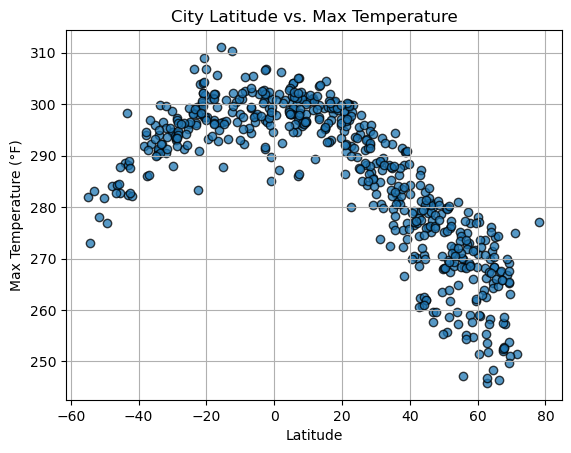

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

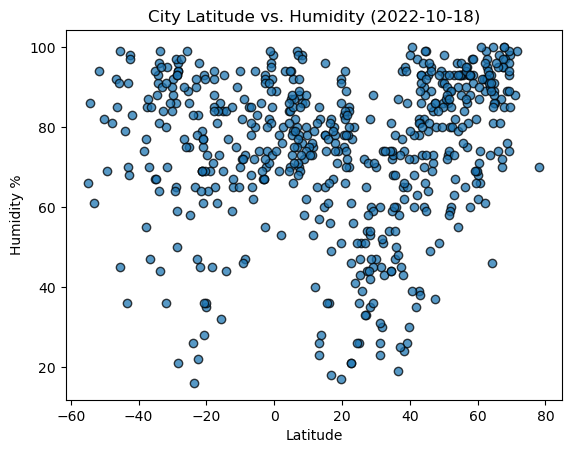

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

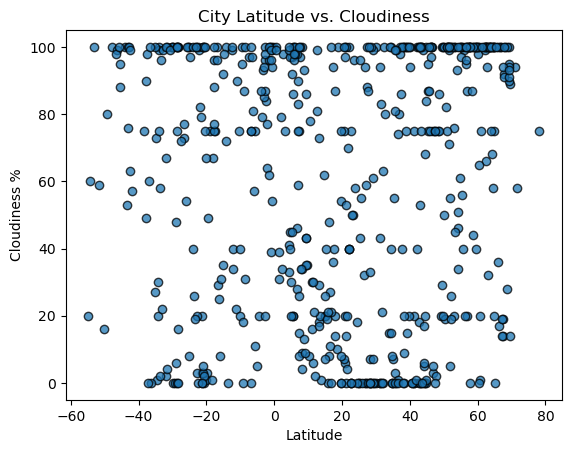

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

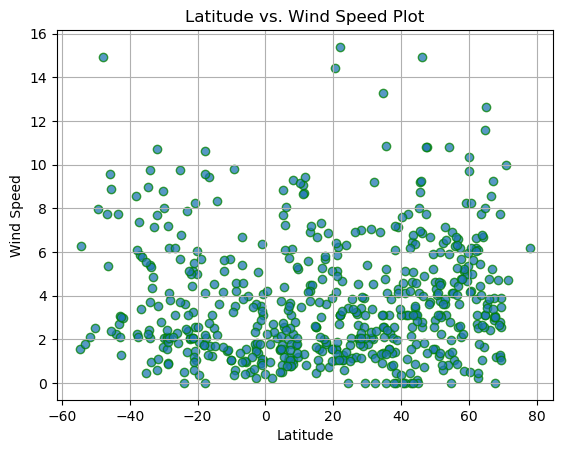

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors= "green", alpha = .75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Text(-54.8, 16.929000000000002, 'The r-value is 0.05256922487363049')

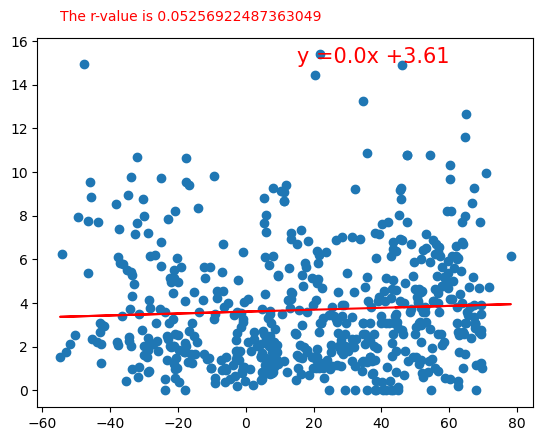

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq, (15,15), fontsize = 15, color = "red")

plt.text(min(x_values), max(y_values) * 1.1, f"The r-value is {rvalue}", color = "red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat" ]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kanniyakumari,8.0833,77.5667,300.93,76,100,9.28,IN,1701144884
3,ust-nera,64.5667,143.2000,248.35,100,100,1.66,RU,1701144885
4,kapuskasing,49.4169,-82.4331,263.51,91,100,5.24,CA,1701144609
6,college,64.8569,-147.8028,268.33,89,100,3.09,US,1701144887
9,sillanwali,31.8261,72.5398,293.41,30,21,2.01,PK,1701144889


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,281.96,66,20,1.54,AR,1701144885
2,alice springs,-23.7000,133.8833,306.90,16,26,3.60,AU,1701144885
5,waitangi,-43.9535,-176.5597,288.61,79,100,2.24,NZ,1701144887
7,avarua,-21.2078,-159.7750,298.18,69,20,5.14,CK,1701144888
8,adamstown,-25.0660,-130.1015,296.06,86,100,9.75,PN,1701144889


###  Temperature vs. Latitude Linear Regression Plot

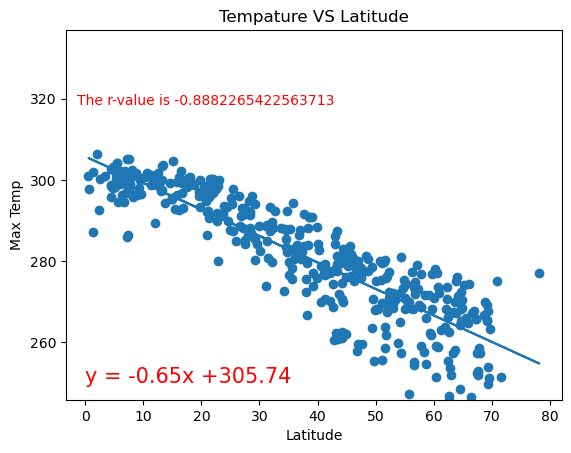

In [15]:

# Linear regression on Northern Hemisphere

y_values = northern_hemi_df["Max Temp"]
x_values = northern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (0,250), fontsize = 15, color = "red")
plt.title("Tempature VS Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_values,regress_values)
plt.ylim(min(y_values),max(y_values) * 1.1)
plt.text(min(x_values) -2, max(y_values) * 1.04, f"The r-value is {rvalue}", color = "red")
plt.show()




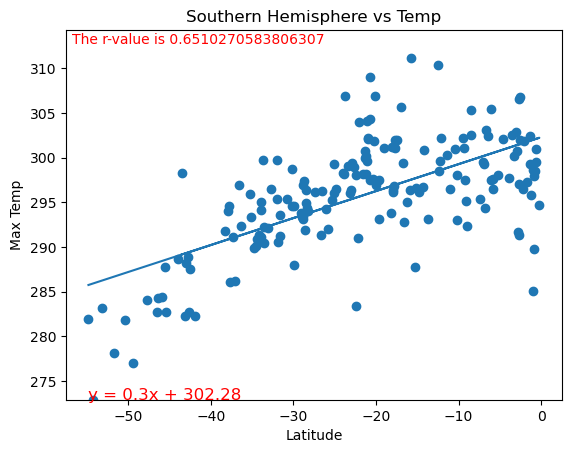

In [16]:
# Linear regression on Southern Hemisphere
y_values = southern_hemi_df["Max Temp"]
x_values = southern_hemi_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere vs Temp")
plt.plot(x_values,regress_values)
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (min(x_values), min(y_values)), fontsize=12, color="red")
plt.ylim(min(y_values),max(y_values) * 1.01)
plt.text(min(x_values) -2, max(y_values) * 1.005, f"The r-value is {rvalue}", color = "red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(-1.4667, 104.0, 'The r-value is 0.2918140277436932')

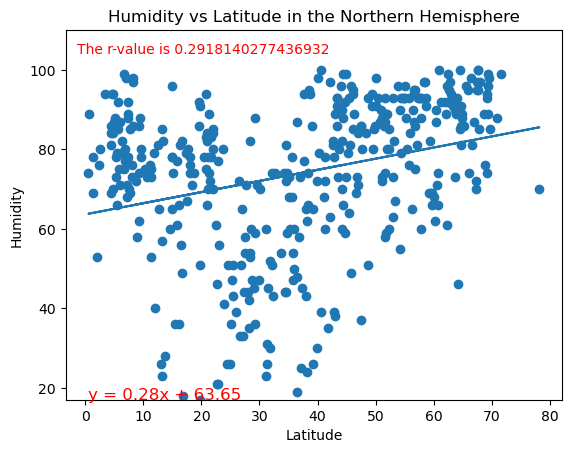

In [17]:

# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.title("Humidity vs Latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (min(x_values), min(y_values)), fontsize=12, color="red")
plt.ylim(min(y_values),max(y_values) * 1.1)
plt.text(min(x_values) -2, max(y_values) * 1.04, f"The r-value is {rvalue}", color = "red")


Text(-56.8, 102.96000000000001, 'The r-value is -0.012416543879394054')

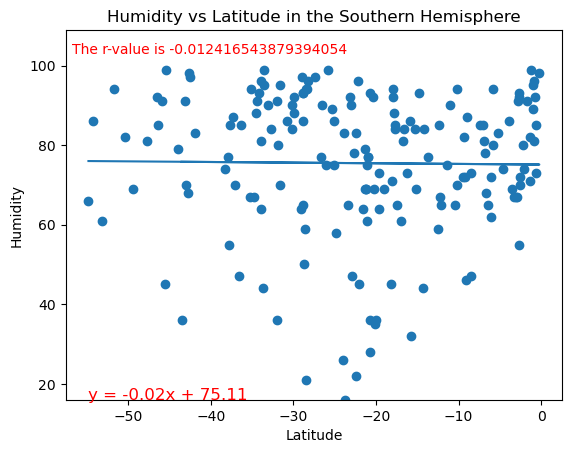

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.title("Humidity vs Latitude in the Southern Hemisphere")
# plt.annotate("y = " + str(round(slope,2))) + "x +" + str(round(intercept,2))
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(min(y_values),max(y_values) * 1.1)
plt.text(min(x_values) -2, max(y_values) * 1.04, f"The r-value is {rvalue}", color = "red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(-1.4667, 104.0, 'The r-value is 0.2654364270335905')

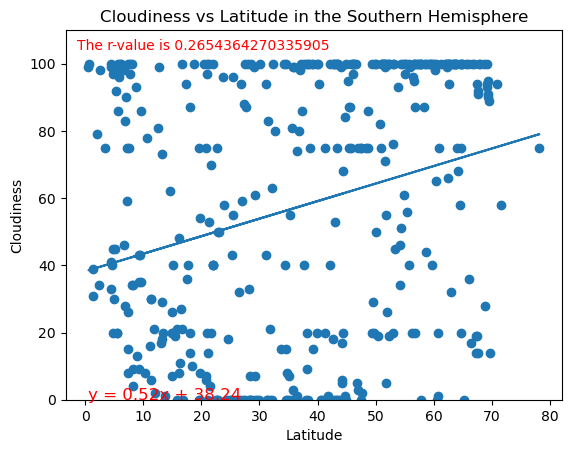

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.title("Cloudiness vs Latitude in the Southern Hemisphere")
# plt.annotate("y = " + str(round(slope,2))) + "x +" + str(round(intercept,2))
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(min(y_values),max(y_values) * 1.1)
plt.text(min(x_values) -2, max(y_values) * 1.04, f"The r-value is {rvalue}", color = "red")


Text(-56.8, 104.0, 'The r-value is 0.032857850225285506')

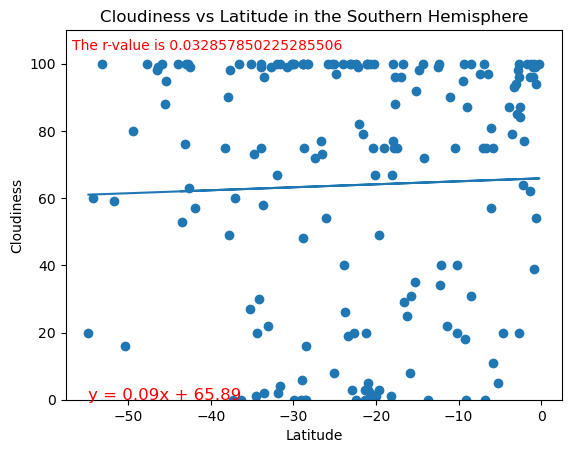

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.title("Cloudiness vs Latitude in the Southern Hemisphere")
# plt.annotate("y = " + str(round(slope,2))) + "x +" + str(round(intercept,2))
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(min(y_values),max(y_values) * 1.1)
plt.text(min(x_values) -2, max(y_values) * 1.04, f"The r-value is {rvalue}", color = "red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(-1.4667, 16.0056, 'The r-value is 0.16127107979903654')

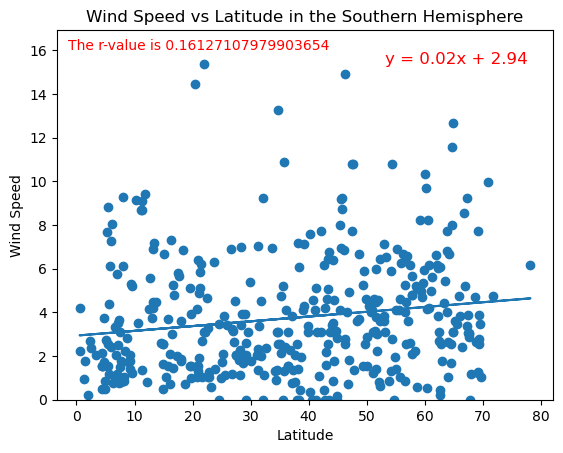

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.title("Wind Speed vs Latitude in the Southern Hemisphere")
# plt.annotate("y = " + str(round(slope,2))) + "x +" + str(round(intercept,2))
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (max(x_values) - 25, max(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(min(y_values),max(y_values) * 1.1)
plt.text(min(x_values) -2, max(y_values) * 1.04, f"The r-value is {rvalue}", color = "red")


Text(-56.8, 15.548, 'The r-value is -0.2863634839456484')

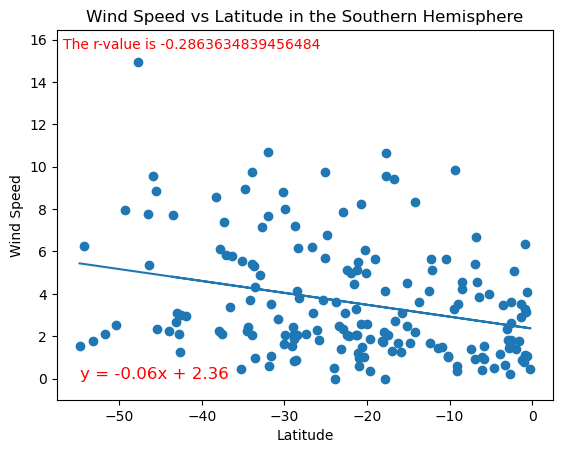

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.title("Wind Speed vs Latitude in the Southern Hemisphere")
# plt.annotate("y = " + str(round(slope,2))) + "x +" + str(round(intercept,2))
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(min(y_values) - 1,max(y_values) * 1.1)
plt.text(min(x_values) -2, max(y_values) * 1.04, f"The r-value is {rvalue}", color = "red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

North Temperature VS Latitude:As you get closer to the equator the temperature gets hotter and as you slowly move away it gets colder. There is a negative regression. 

South Temperature VS Latitude:The closer you get to the equator the warmer it gets again. There is a negative regression. This is the opposite of the North because you are getting closer.



North Humidity:The humidity slowly decreases as you get closer to the equator. 

South Humidity:The humidity slowly increases as you get closer from the south end. 



North Cloudiness:There is a positive regression but there aren't many clusters of data, mainly data everywhere. 

South Cloudiness:There is a very slim regression on the positive side. 



North Wind Speed:There is a slight positive regression as you move away from the equator. 

South Wind Speed:As you get closer to the equator from the south end there is a negative regression. 